## Installation Commands (Required Libraries):

In [1]:
pip install fireducks pandas matplotlib numpy duckdb

##Enable Benchmark Mode (FireDucks Special):

In [2]:
import os
os.environ["FIREDUCKS_FLAGS"] = "--benchmark-mode"

##Code to Generate Large Dataset (10 Million Rows):

In [3]:
import pandas as pd
import numpy as np

# Create 10 Million rows
df = pd.DataFrame({
    'user_id': np.random.randint(1, 1_000_000, 10_000_000),
    'amount': np.random.rand(10_000_000) * 1000,  # up to 1000
    'category': np.random.choice(['food', 'tech', 'fashion', 'travel'], 10_000_000),
    'timestamp': pd.date_range(start='2021-01-01', periods=10_000_000, freq='s')
})

# Save to CSV
df.to_csv('large_dataset.csv', index=False)

print("Dataset with 10 Million Rows Generated Successfully!")


Dataset with 10 Million Rows Generated Successfully!


##Basic CSV Read & Filter:

In [4]:
import os
import time

## for Pandas
import pandas as pd
start_time = time.time()
pdf = pd.read_csv('large_dataset.csv')
print(pdf.head())
print("Pandas Read Time:", time.time() - start_time)

## for FireDucks
import fireducks.pandas as fd
start_time = time.time()
fdf = fd.read_csv('large_dataset.csv')
print(fdf.head())
print("FireDucks Read Time:", time.time() - start_time)


   user_id      amount category            timestamp
0   883227  778.516915  fashion  2021-01-01 00:00:00
1     9714  445.218871     tech  2021-01-01 00:00:01
2   384243  872.526174  fashion  2021-01-01 00:00:02
3   940892  632.265345  fashion  2021-01-01 00:00:03
4   856344  963.104442  fashion  2021-01-01 00:00:04
Pandas Read Time: 13.672954559326172
   user_id      amount category            timestamp
0   883227  778.516915  fashion  2021-01-01 00:00:00
1     9714  445.218871     tech  2021-01-01 00:00:01
2   384243  872.526174  fashion  2021-01-01 00:00:02
3   940892  632.265345  fashion  2021-01-01 00:00:03
4   856344  963.104442  fashion  2021-01-01 00:00:04
FireDucks Read Time: 2.64827299118042


##GroupBy Category (Average amount):

In [5]:
## for Pandas
start = time.time()
pdf_grouped = pdf.groupby('category')['amount'].mean().reset_index()
print(pdf_grouped)
print("Pandas GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_grouped = fdf.groupby('category')['amount'].mean().reset_index()
print(fdf_grouped)
print("FireDucks GroupBy Time:", time.time() - start)

  category      amount
0  fashion  499.779968
1     food  499.929447
2     tech  500.108681
3   travel  500.127916
Pandas GroupBy Time: 1.133331060409546
  category      amount
0  fashion  499.779968
1     food  499.929447
2     tech  500.108681
3   travel  500.127916
FireDucks GroupBy Time: 0.2903892993927002



##Filter + GroupBy (amount > 500 → Avg amount per category):

In [6]:
## for Pandas
start = time.time()
pdf_result = pdf[pdf['amount'] > 500].groupby('category')['amount'].mean().reset_index()
print(pdf_result)
print("Pandas Filter + GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_result = fdf[fdf['amount'] > 500].groupby('category')['amount'].mean().reset_index()
print(fdf_result)
print("FireDucks Filter + GroupBy Time:", time.time() - start)


  category      amount
0  fashion  749.896275
1     food  749.998028
2     tech  750.143038
3   travel  750.168491
Pandas Filter + GroupBy Time: 1.0269274711608887
  category      amount
0  fashion  749.896275
1     food  749.998028
2     tech  750.143038
3   travel  750.168491
FireDucks Filter + GroupBy Time: 0.4077315330505371


##Sort by amount (Descending):

In [7]:

## for Pandas
start = time.time()
pdf_sorted = pdf.sort_values('amount', ascending=False).groupby('category').head(5)
print(pdf_sorted)
print("Pandas Sort Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_sorted = fdf.sort_values('amount', ascending=False).groupby('category').head(5)
print(fdf_sorted)
print("FireDucks Sort Time:", time.time() - start)



         user_id      amount category            timestamp
3717615   595410  999.999967     tech  2021-02-13 00:40:15
1499237   715978  999.999964     tech  2021-01-18 08:27:17
4164382   143012  999.999844     food  2021-02-18 04:46:22
1471937   793240  999.999820     tech  2021-01-18 00:52:17
8895355   308218  999.999703   travel  2021-04-13 22:55:55
1287432   841317  999.999636     tech  2021-01-15 21:37:12
9817016   737468  999.999432     food  2021-04-24 14:56:56
3360827   846047  999.999281  fashion  2021-02-08 21:33:47
2239390   480386  999.999237     tech  2021-01-26 22:03:10
7736825   211426  999.998991   travel  2021-03-31 13:07:05
3062037   986205  999.998941     food  2021-02-05 10:33:57
104508    211284  999.998931   travel  2021-01-02 05:01:48
8981570   393383  999.998863  fashion  2021-04-14 22:52:50
616193    208589  999.998703     food  2021-01-08 03:09:53
6795483   471190  999.998645   travel  2021-03-20 15:38:03
3070076     9380  999.998547     food  2021-02-05 12:47:

##Count Transactions per Category




In [8]:
# Pandas
start_time = time.time()
pdf_grouped = pdf.groupby('category')['user_id'].count().reset_index()
print(pdf_grouped.head())
print("Pandas Count Time:", time.time() - start_time)

# FireDucks
start_time = time.time()
fdf_grouped = fdf.groupby('category')['user_id'].count().reset_index()
print(fdf_grouped.head())
print("FireDucks Count Time:", time.time() - start_time)

  category  user_id
0  fashion  2500496
1     food  2500335
2     tech  2500866
3   travel  2498303
Pandas Count Time: 0.7953543663024902
  category  user_id
0  fashion  2500496
1     food  2500335
2     tech  2500866
3   travel  2498303
FireDucks Count Time: 0.24725675582885742


##Total Amount per Category


In [9]:
# Pandas
start_time = time.time()
pdf_total = pdf.groupby('category')['amount'].sum().reset_index()
print(pdf_total.head())
print("Pandas Total Amount Time:", time.time() - start_time)

# FireDucks
start_time = time.time()
fdf_total = fdf.groupby('category')['amount'].sum().reset_index()
print(fdf_total.head())
print("FireDucks Total Amount Time:", time.time() - start_time)

  category        amount
0  fashion  1.249698e+09
1     food  1.249991e+09
2     tech  1.250705e+09
3   travel  1.249471e+09
Pandas Total Amount Time: 0.8197705745697021
  category        amount
0  fashion  1.249698e+09
1     food  1.249991e+09
2     tech  1.250705e+09
3   travel  1.249471e+09
FireDucks Total Amount Time: 0.26024699211120605


##Performance Comparison: Pandas vs FireDucks (Bar Chart):

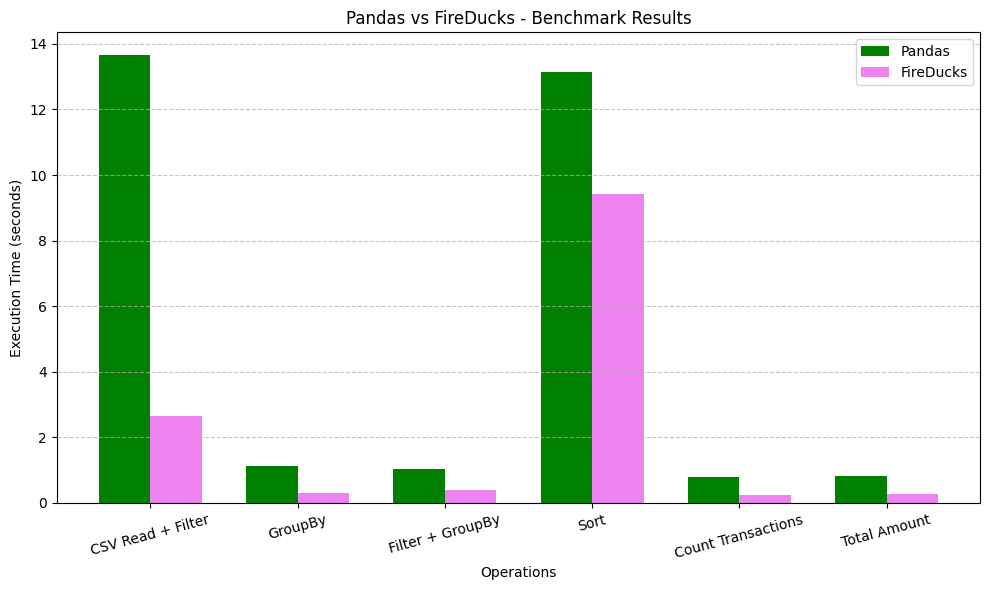

In [10]:
import matplotlib.pyplot as plt

# Operation Names
operations = ['CSV Read + Filter', 'GroupBy', 'Filter + GroupBy', 'Sort', 'Count Transactions', 'Total Amount']

# Execution Times (in seconds)
pandas_times = [13.67, 1.13, 1.02, 13.15, 0.79, 0.81]      # Pandas Times
fireducks_times = [2.64, 0.29, 0.40, 9.42, 0.24, 0.26]     # FireDucks Times

x = range(len(operations))

plt.figure(figsize=(10, 6))
plt.bar(x, pandas_times, width=0.35, label='Pandas', color='green')
plt.bar([i + 0.35 for i in x], fireducks_times, width=0.35, label='FireDucks', color='violet')

plt.xlabel('Operations')
plt.ylabel('Execution Time (seconds)')
plt.title('Pandas vs FireDucks - Benchmark Results')
plt.xticks([i + 0.175 for i in x], operations, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()